In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

Энергия взаимодействия

In [6]:
J = 1.0

In [7]:
def spin_interaction(sconfig, i, j):
    idx = i+1 if i+1 < sconfig.shape[0] else 0
    jdx = j+1 if j+1 < sconfig.shape[1] else 0
    return -J*sconfig[i][j] * (sconfig[idx][j] + sconfig[i][jdx] + sconfig[i-1][j] + sconfig[i][j-1])

def energy(sconfig):
    nrj = 0
    for j in range(sconfig.shape[0]):
        for i in range(sconfig.shape[1]):
            idx = i+1 if i+1 < sconfig.shape[0] else 0
            jdx = j+1 if j+1 < sconfig.shape[1] else 0
            nrj -= J*sconfig[i][j] * (sconfig[idx][j] + sconfig[i][jdx])
    return nrj

def magnetization(sconfig):
    return np.sum(sconfig) / float(sconfig.shape[0]*sconfig.shape[1])

def metropolis(sconfig, temp):
    mat = sconfig.copy()
    for i in range(sconfig.shape[0]):
        for j in range(sconfig.shape[1]):
            e = spin_interaction(mat, i, j)
            if e > 0:
                mat[i][j] *= -1
            else:
                if np.random.rand() <= np.exp(2.0*e/temp):
                    mat[i][j] *= -1
    return mat

def run(sconfig, temp, max_epoch, verbose=False):
    mags = list()
    energies = list()
    mean_energy = 0
    mean_mag = 0
    lattices = list()
    new = metropolis(sconfig, temp)
    for t in tqdm(xrange(max_epoch), disable = not verbose):
        new = metropolis(new, temp)
        mags.append(magnetization(new))
        energies.append(energy(new))
        lattices.append(new)
    return lattices, energies, mags

Задается решетка 8х8 со всеми спинами вверх

In [8]:
randmat = np.random.randint(low=0, high=2, size = (8, 8))
#spin_config = (randmat + (randmat-1)).astype('float32')
spin_config = np.ones((8, 8))

temperatures = np.arange(0.5, 5, 0.2)

Численная симуляция двумерной модели Изинга с помощью алгоритма Метрополиса для 10 000 шагов при температуре Т=2

In [9]:
lattices, E, M = run(spin_config, temp=2.0, max_epoch=10000, verbose=True)

100%|██████████| 10000/10000 [00:06<00:00, 1638.72it/s]


<IPython.core.display.Javascript object>


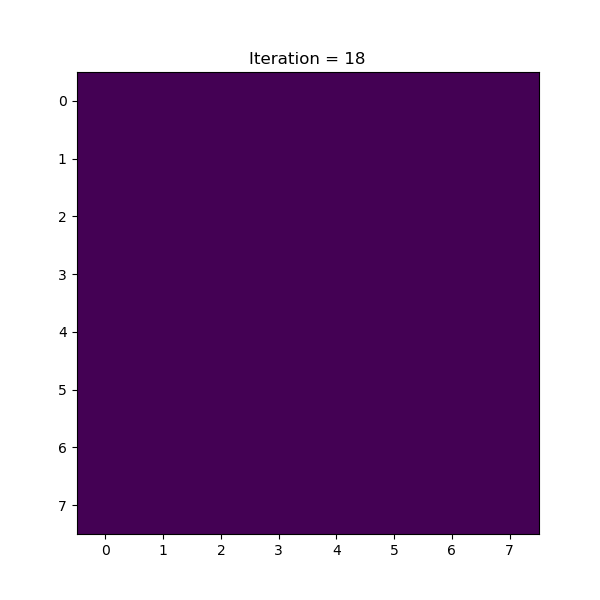

In [10]:
fig = plt.figure(figsize=(6,6))
plt.title('Iteration = 0')
im = plt.imshow(lattices[0], interpolation='bilinear')

def update(j):
    im.set_array(lattices[j])
    plt.title('Iteration = {}'.format(j))
    return im

ani = animation.FuncAnimation(fig, update, frames=len(lattices), blit=True)

Значения намагничености и энергии на каждом шаге Монте-Карло

<IPython.core.display.Javascript object>


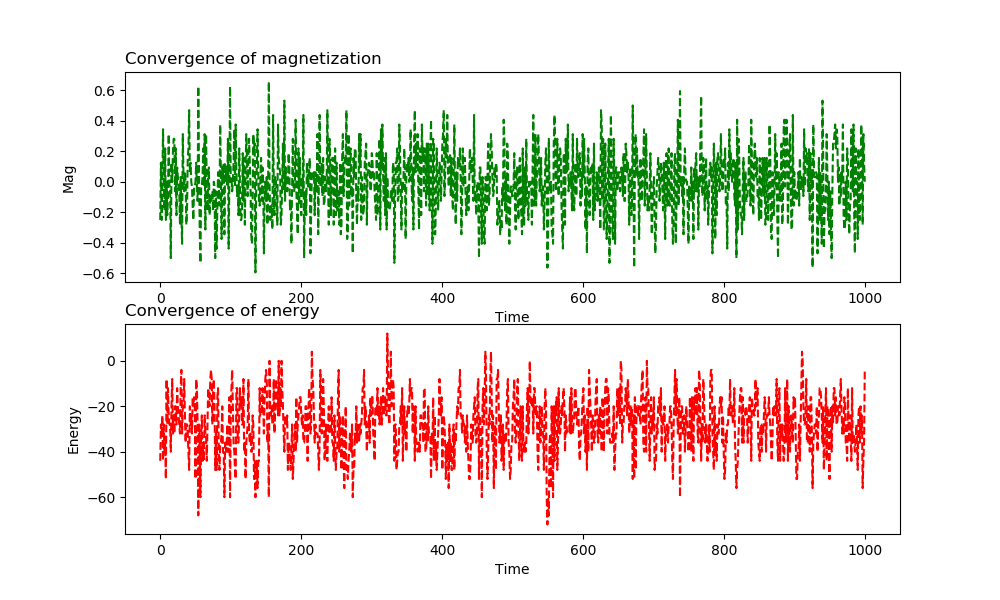

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(np.arange(len(M)), M, 'g--')
plt.title('Convergence of magnetization', loc='left')
plt.xlabel('Time')
plt.ylabel('Mag')

plt.subplot(212)
plt.plot(np.arange(len(E)), E, 'r--')
plt.title('Convergence of energy', loc='left')
plt.xlabel('Time')
plt.ylabel('Energy')

plt.show()

Моделирование модели Изинга с 1000 шагами для различных температур

In [15]:
configs = list()
E_ls = list()
M_ls = list()
for t in tqdm(temperatures):
    new_spins, E, M = run(spin_config, temp=t, max_epoch=1000)
    configs.append(new_spins)
    E_ls.append(E)
    M_ls.append(M)

100%|██████████| 23/23 [00:13<00:00,  1.74it/s]


Энергия и намагниченность решетки определяется как среднее по всем шагам Монте-Карло

<IPython.core.display.Javascript object>


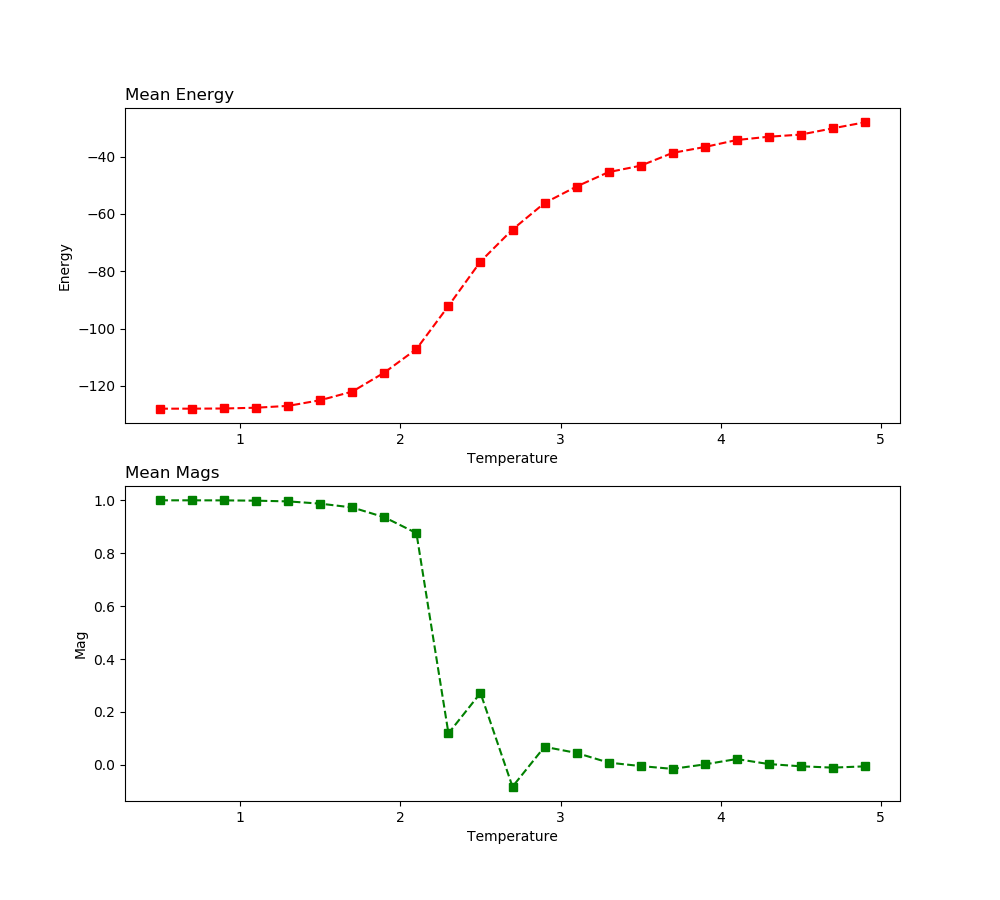

In [19]:
plt.figure(figsize=(10,9))
plt.subplot(211)
plt.plot(temperatures, [np.mean(E_ls[i]) for i in range(len(E_ls))], 'rs--')
plt.title('Mean Energy', loc='left')
plt.xlabel('Temperature')
plt.ylabel('Energy')


plt.subplot(212)
plt.plot(temperatures, [np.mean(M_ls[i]) for i in range(len(M_ls))], 'gs--')
plt.title('Mean Mags', loc='left')
plt.xlabel('Temperature')
plt.ylabel('Mag')
plt.show()

In [ ]:
len()